In [1]:
""" load them libs """
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import pandas as pd
import statsmodels.api as sm
import glob
import os
import numpy as np
from PIL import Image
from helpers import *
import pickle
import time
import matplotlib.patches as mpatches
#random.seed(100)
#tic = time.time()

/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
""" get all files """
files = glob.glob('./matrix_csvs/*')

all_files = sorted([f for f in files if (f.split('/')[-1].split('_')[-1]=='influence.csv')])

print all_files

['./matrix_csvs/2004.75_por_green_influence.csv', './matrix_csvs/2007.75_por_green_influence.csv', './matrix_csvs/2008.75_por_green_influence.csv', './matrix_csvs/2009.75_por_green_influence.csv', './matrix_csvs/2010.75_por_green_influence.csv', './matrix_csvs/2011.5_por_green_influence.csv', './matrix_csvs/2012.75_por_green_influence.csv', './matrix_csvs/2013.75_por_green_influence.csv', './matrix_csvs/2014.75_por_green_influence.csv', './matrix_csvs/2015.0_por_green_influence.csv', './matrix_csvs/2015.25_por_green_influence.csv', './matrix_csvs/2015.5_por_green_influence.csv', './matrix_csvs/2015.75_por_green_influence.csv', './matrix_csvs/2016.0_por_green_influence.csv', './matrix_csvs/2016.25_por_green_influence.csv', './matrix_csvs/2016.5_por_green_influence.csv', './matrix_csvs/2016.75_por_green_influence.csv', './matrix_csvs/2017.0_por_green_influence.csv', './matrix_csvs/2017.25_por_green_influence.csv', './matrix_csvs/2017.5_por_green_influence.csv', './matrix_csvs/2017.75_por

In [3]:
""" get a dict going with files and data """
data = {}
years = range(2007,2018)
years_m = [2007,2008,2009,2010,2012,2013,2014,2015,2016,2017]
for y in years_m:
    fname_all = [f for f in all_files if ((str(y)+'.75') in f)][0]
    data[y]={'year':y,
             'fname_all':fname_all,
             'data_all':0.0}

    #2011 notes
data[2011]={'year': 2011,
            'fname_all': './matrix_csvs/2011.5_por_green_influence.csv',
            'data_all': 0.0}
    
for y in years:
    print data[y]


{'fname_all': './matrix_csvs/2007.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2007}
{'fname_all': './matrix_csvs/2008.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2008}
{'fname_all': './matrix_csvs/2009.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2009}
{'fname_all': './matrix_csvs/2010.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2010}
{'fname_all': './matrix_csvs/2011.5_por_green_influence.csv', 'data_all': 0.0, 'year': 2011}
{'fname_all': './matrix_csvs/2012.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2012}
{'fname_all': './matrix_csvs/2013.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2013}
{'fname_all': './matrix_csvs/2014.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2014}
{'fname_all': './matrix_csvs/2015.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2015}
{'fname_all': './matrix_csvs/2016.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2016}
{'fname_all': './matrix_csvs/2017.75_por_green_influence.csv'

In [4]:
for y in years:
    print y
    data[y]['data_all']=pd.read_csv(data[y]['fname_all'], encoding='utf-8')
    print data[y]['data_all'].shape
    print list(data[y]['data_all'])

2007
(219, 223)
['Unnamed: 0', u'POR_GREEN', u'INFLUENCE', u'AD', u'AE', u'AF', u'AG', u'AI', u'AL', u'AM', u'AN', u'AO', u'AQ', u'AR', u'AS', u'AT', u'AU', u'AW', u'AZ', u'BA', u'BB', u'BD', u'BE', u'BF', u'BG', u'BH', u'BI', u'BJ', u'BM', u'BN', u'BO', u'BR', u'BS', u'BT', u'BW', u'BY', u'BZ', u'CA', u'CF', u'CG', u'CH', u'CI', u'CK', u'CL', u'CM', u'CN', u'CO', u'CR', u'CU', u'CV', u'CY', u'CZ', u'DE', u'DJ', u'DK', u'DM', u'DO', u'DZ', u'EC', u'EE', u'EG', u'EH', u'ER', u'ES', u'ET', u'FI', u'FJ', u'FK', u'FM', u'FO', u'FR', u'GA', u'GB', u'GD', u'GE', u'GF', u'GH', u'GI', u'GL', u'GM', u'GN', u'GP', u'GQ', u'GR', u'GT', u'GU', u'GW', u'GY', u'HN', u'HR', u'HT', u'HU', u'ID', u'IE', u'IL', u'IM', u'IN', u'IQ', u'IR', u'IS', u'IT', u'JM', u'JO', u'JP', u'KE', u'KG', u'KH', u'KI', u'KM', u'KN', u'KP', u'KR', u'KW', u'KY', u'KZ', u'LA', u'LB', u'LC', u'LI', u'LK', u'LR', u'LS', u'LT', u'LU', u'LV', u'LY', u'MA', u'MC', u'MD', u'ME', u'MG', u'MH', u'MK', u'ML', u'MM', u'MN', u'MP', u'M

In [5]:
""" fill out extra columns """

all_indices = []

for y in years:
    all_indices += list(data[y]['data_all'])
    
print set(all_indices)

for y in years:
    new_cols = [v for v in set(all_indices) if v not in data[y]['data_all']]
    for v in new_cols:
        data[y]['data_all'][v]=0
        

set([u'BD', u'BE', u'BF', u'BG', u'BA', u'BB', u'WF', u'BM', u'BN', u'BO', u'BH', u'BI', u'BJ', u'BT', u'JM', u'BW', u'WS', u'BQ', u'BR', u'BS', u'BY', u'BZ', u'RU', u'RW', 'Unnamed: 0', u'RS', u'INFLUENCE', u'TL', u'RE', u'TM', u'TJ', u'RO', u'TK', u'GW', u'GU', u'GT', u'GS', u'GR', u'GQ', u'GP', u'JP', u'GY', u'GF', u'GE', u'GD', u'GB', u'GA', u'SV', u'GN', u'GM', u'GL', u'GI', u'GH', u'OM', u'TN', u'JO', u'HR', u'HT', u'HU', u'HN', u'VE', u'PS', u'PW', u'PT', u'PY', u'IQ', u'PA', u'PF', u'PG', u'PE', u'PK', u'PH', u'PL', u'PM', u'ZM', u'EH', u'EE', u'EG', u'ZA', u'EC', u'IT', u'VN', u'SB', u'ET', u'ZW', u'SA', u'ES', u'ER', u'ME', u'MD', u'MG', u'MF', u'MA', u'MC', u'UZ', u'MM', u'ML', u'MN', u'MH', u'MK', u'MU', u'MT', u'MW', u'MV', u'MQ', u'MP', u'MS', u'MR', u'IM', u'UG', u'MY', u'MX', u'IL', u'FR', u'SH', u'FI', u'FJ', u'FK', u'FM', u'FO', u'NI', u'NL', u'NO', u'SO', u'VU', u'NC', u'NE', u'NG', u'NZ', u'NP', u'NR', u'NU', u'CK', u'XK', u'CI', u'CH', u'CO', u'CN', u'CM', u'CL', u

In [6]:
""" add INFLUENCE_t-1"""

for y in years[1:]:
    data[y]['data_all'] = data[y]['data_all'].merge(data[y-1]['data_all'][['INFLUENCE']], left_index=True, right_index=True, how='left', suffixes=('','_t-1'))
    data[y]['data_all']['INFLUENCE_t-1'] = data[y]['data_all']['INFLUENCE_t-1'].fillna(0.0)
    
print data[2017]['data_all']

    Unnamed: 0  POR_GREEN  INFLUENCE  AD  AE  AF  AG  AI  AL  AM  \
0           UA   0.013571   0.000072   0   0   0   0   0   0   0   
1           CZ   0.066208   0.001055   0   0   0   0   0   0   0   
2           HR   0.154703   0.006881   0   0   0   0   0   0   0   
3           BG   0.104660   0.008198   0   0   0   0   0   0   0   
4           CU   0.043179   0.000861   0   0   0   0   0   0   0   
5           AU   0.122233   0.002450   0   0   0   0   0   0   0   
6           AR   0.112371   0.000722   0   0   0   0   0   0   0   
7           BR   0.147877   0.000622   0   0   0   0   0   0   0   
8           SV   0.281331   0.000000   0   0   0   0   0   0   0   
9           TH   0.246493   0.000369   0   0   0   0   0   0   0   
10          SY   0.104090   0.000000   0   0   0   0   0   0   0   
11          IN   0.106307   0.000187   0   0   0   0   0   0   0   
12          GB   0.317987   0.009776   0   0   0   0   0   0   0   
13          MX   0.191988   0.004288   0   0   0

In [7]:
""" concat whole list """

df = pd.concat([data[y]['data_all'] for y in years[1:]], axis=0)
df.DATE = df.DATE-2007

print df

print df.shape

     AD  AE  AF  AG  AI  AL  AM  AN  AO  AQ ...  VN  VU  WF  WS  XK  YE  YT  \
0     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
10    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
11    0   0   0   0   0   0   0   0   0   0 ...   0 

In [8]:
""" Train an OLS model """

Y = df.POR_GREEN
X = df.drop(['POR_GREEN','INFLUENCE','Unnamed: 0'],axis=1)
#X.to_csv('test_df.csv')

print X
#print list(X)
#print X.DATE
X.DATE = (X.DATE - X.DATE.min())/(X.DATE.max()-X.DATE.min())
X['INFLUENCE_t-1'] = (X['INFLUENCE_t-1'] - X['INFLUENCE_t-1'].min())/(X['INFLUENCE_t-1'].max()-X['INFLUENCE_t-1'].min())
#print X['INFLUENCE_t-1']
#X.to_csv('data.csv')
#print X.isnull().any().any()
#print X.DATE
#print X['INFLUENCE_t-1']
#print X.shape


print Y
#print list(X)
#print list(Y)
X = sm.add_constant(X)
est = sm.OLS(Y,X)
est = est.fit()
print est.summary()
#print est.summary().as_csv()

#with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
#    print est.params


     AD  AE  AF  AG  AI  AL  AM  AN  AO  AQ ...  VN  VU  WF  WS  XK  YE  YT  \
0     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
10    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
11    0   0   0   0   0   0   0   0   0   0 ...   0 

In [9]:
'''This takes the result of an statsmodel results table and transforms it into a dataframe'''
print dir(est)

results_df = pd.DataFrame({"pvals":est.pvalues,
                               "coeff":est.params,
                               "conf_lower":est.conf_int()[0],
                               "conf_higher":est.conf_int()[1],
                               'tvalues':est.tvalues
                                })

#Reordering...
results_df = results_df[["coeff","tvalues","pvals","conf_lower","conf_higher"]]

print results_df

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', '

In [10]:
""" plot country coefficients"""

df_iso2 = pd.read_csv('all_portions.csv', encoding='utf-8').set_index('iso2')
#print df_centroids.get_value('TH','latitude')
print df_iso2

cols_dict = {
    'OTHERX':'#7700a3',
    'US':'#00ffcb',
    'LAM':'#ffb200',
    'OECD_EUR':'#0021ff',
    'OECD_PAC':'#00cbff',
    'OECD_AMX':'#0f0066',
    'AFRICA':'#00ff08',
    'ME':'#3ea535',
    'CN':'#ff0043',
    'IN':'#ff00d4',
    'TE':'#6b5900'
}

#results_df = results_df.merge(df_iso2[['SIPS_REGION']], how='left')

results_df['SIPS_REGION'] = df_iso2['SIPS_REGION']
results_df['color'] = np.nan
results_df['color'] = results_df[pd.notnull(results_df.SIPS_REGION)].apply(lambda row: cols_dict[row['SIPS_REGION']], axis=1)
#results_df['color'] = results_df['color'].replace({'color',cols_dict})

print results_df

      Unnamed: 0                          country iso3  iso_num       region  \
iso2                                                                           
AF             0                      Afghanistan  AFG      4.0         ASIA   
AX             1                    Aland Islands  ALA    248.0       EUROPE   
AL             2                          Albania  ALB      8.0       EUROPE   
DZ             3                          Algeria  DZA     12.0       AFRICA   
AS             4                   American Samoa  ASM     16.0  ANZ-OCEANIA   
AD             5                          Andorra  AND     20.0       EUROPE   
AO             6                           Angola  AGO     24.0       AFRICA   
AI             7                         Anguilla  AIA    660.0        LATIN   
AQ             8                       Antarctica  ATA     10.0  ANZ-OCEANIA   
AG             9              Antigua and Barbuda  ATG     28.0        LATIN   
AR            10                        

                   coeff     tvalues          pvals  conf_lower  conf_higher  \
SIPS_REGION                                                                    
AFRICA      CD -0.090981   -7.149507   1.213643e-12   -0.115937    -0.066024   
            MG -0.076619   -8.512585   3.274980e-17   -0.094271    -0.058967   
            CF -0.076606   -8.511430   3.306619e-17   -0.094257    -0.058955   
            CM -0.076559   -8.506205   3.453614e-17   -0.094210    -0.058908   
            NE -0.076555   -8.505674   3.468908e-17   -0.094206    -0.058904   
            DJ -0.076547   -8.504624   3.499345e-17   -0.094199    -0.058896   
            GN -0.076539   -8.503542   3.530997e-17   -0.094191    -0.058887   
            KM -0.076536   -8.503080   3.544593e-17   -0.094188    -0.058884   
            BI -0.076536   -8.502986   3.547342e-17   -0.094188    -0.058883   
            BJ -0.076532   -8.502424   3.563969e-17   -0.094184    -0.058879   
            LS -0.076531   -8.502328   3

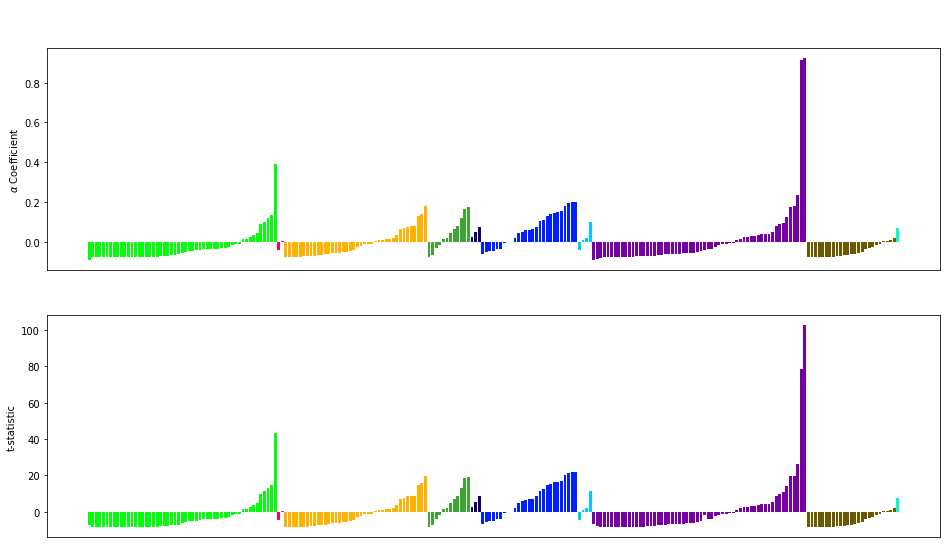

In [11]:
f, axarr = plt.subplots(2, sharex=True, figsize=(16,9))

#axarr.set_yscale('log')

bars_df = results_df[pd.notnull(results_df.SIPS_REGION)]

bars_df = bars_df.groupby('SIPS_REGION').apply(pd.DataFrame.sort_values, 'coeff')
print bars_df[:]




axarr[0].bar(range(len(bars_df)),
          bars_df.coeff,
          color=bars_df['color']
    )
axarr[1].bar(range(len(bars_df)),
          bars_df.tvalues,
          color=bars_df['color']
    )
axarr[0].set_xticks([])
axarr[0].set_xticklabels([])
axarr[0].set_ylabel(r'$\alpha$ Coefficient')
axarr[1].set_ylabel('t-statistic')

patches = []
labels=[]
for k,v in cols_dict.items():
    labels.append(k)
    patches.append(mpatches.Patch(color=v))

f.legend(patches, labels, loc='center', bbox_to_anchor=(0.5,0.93), ncol=len(cols_dict))
f.savefig('./figures/OLS_countries.png')

plt.show()

                  coeff    tvalues          pvals  conf_lower  conf_higher  \
const          0.050946  45.293075  2.195075e-309    0.048741     0.053152   
DATE           0.051455  27.063675  8.141308e-138    0.047726     0.055183   
INFLUENCE_t-1  0.005149   0.394524   6.932363e-01   -0.020445     0.030743   

              SIPS_REGION color  
const                 NaN   NaN  
DATE                  NaN   NaN  
INFLUENCE_t-1         NaN   NaN  


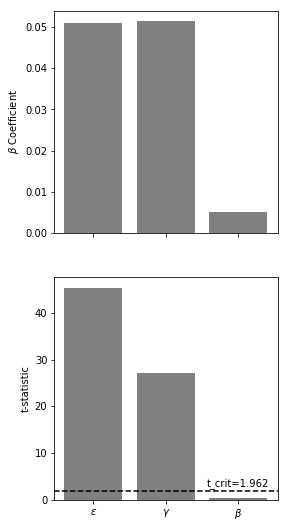

In [12]:
f, axarr = plt.subplots(2, sharex=True, figsize=(4,9))

#axarr.set_yscale('log')

bars_df = results_df[pd.isnull(results_df.SIPS_REGION)]

print bars_df

axarr[0].bar(range(len(bars_df)),
          bars_df.coeff,
          color='gray'
    )
axarr[1].bar(range(len(bars_df)),
          bars_df.tvalues,
          color='gray'
    )

axarr[0].set_xticks(range(len(bars_df)))
axarr[0].set_xticklabels([r'$\epsilon$',r'$\gamma$',r'$\beta$'])
axarr[1].set_xticklabels([r'$\epsilon$',r'$\gamma$',r'$\beta$'])
axarr[0].set_ylabel(r'$\beta$ Coefficient')
axarr[1].set_ylabel('t-statistic')
axarr[1].axhline(1.962, linestyle='--', color='black')
axarr[1].text(2,3,'t_crit=1.962', horizontalalignment='center')


f.savefig('./figures/OLS_other.png')

plt.show()